In [1]:
from astropy.io import fits
import os
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
def find_channel_by_energy(ebounds, energy):
    """
    find channel index by energy
    Args:
        ebounds (np.array): [channel, energy_min, energy_max]
        energy (float): energy

    Returns:
        index of channel (int)

    Raises:
        The input energy exceeds the energy range

    """
    # Since the energy of the last 50 energy channels of GECAM is not increasing,
    # only the first 448 is taken
    ebounds = ebounds[:448]

    if energy > ebounds.field("E_MAX")[-1]:
        return len(ebounds) - 1

    # channels = ebounds.field("CHANNEL")
    e_min = ebounds.field("E_MIN")
    e_max = ebounds.field("E_MAX")

    if energy < e_min[0]:
        # warnings.warn(f"The input energy:{energy} is beyond the energy range ({e_min[0]} to {e_max[-1]}).")
        return 0
    elif energy > e_max[-1]:
        # warnings.warn(f"The input energy:{energy} is beyond the energy range ({e_min[0]} to {e_max[-1]}).")
        return len(ebounds) - 1

    c_index_list = np.where((energy >= e_min) & (energy < e_max))[0]
    if len(c_index_list) == 0:
        raise Exception(f"The input energy:{energy} is beyond the energy range ({e_min[0]} to {e_max[-1]}).")

    return c_index_list[-1]


def _get_channel_bins_by_energy_bin(energy_bin, ebounds):
    if type(energy_bin) in [int, float]:

        e_min = ebounds.field("E_MIN")[0]
        e_max = ebounds.field("E_MAX")[-1]

        e_bins = np.arange(e_min, e_max + energy_bin, energy_bin, dtype=np.int16)
    else:
        e_bins = energy_bin

    channel_bins = []
    for energy in e_bins:
        channel_bins.append(find_channel_by_energy(ebounds, energy))

    return np.array(channel_bins)

In [3]:
fits_obj = fits.open(r"D:\test\gecam\gbg_evt_tn230307_154406_fb_v00.fits")

In [4]:
ebounds_data = fits_obj["EBOUNDS"].data

In [5]:
det_num = 1

det_data = fits_obj[f"EVENTS{str(det_num).zfill(2)}"].data

det_data.names

['TIME', 'PI', 'GAIN_TYPE', 'DEAD_TIME', 'EVT_TYPE', 'FLAG', 'EVT_PAIR']

In [6]:
trig_met = 131903046.65

In [70]:

def get_det_lc(fits_obj, det_num, time_bins, energy_bins):
    det_data = fits_obj[f"EVENTS{str(det_num).zfill(2)}"].data

    channel_bins = _get_channel_bins_by_energy_bin(energy_bins, ebounds_data)

    commend_filter = (det_data.field("FLAG") < 10)
    time_array = det_data["TIME"][commend_filter]
    channel_array = det_data["PI"][commend_filter]

    y, (time_x, channel_x) = np.histogramdd((time_array, channel_array), (time_bins, channel_bins))

    return time_x, channel_x, y


In [74]:
det_num_list = [1,4,5]
time_bin = 0.064
time_bins = np.arange(trig_met - 10, trig_met + 50 + time_bin, time_bin)
time_bins = np.array([131903036.6020007, 131903036.6660007, 131903036.73000069, 131903036.79400069, 131903036.85800068,
                      131903036.92200068, 131903036.98600067, 131903037.05000067, 131903037.11400066,
                      131903037.17800066, 131903037.24200065, 131903037.30600065, 131903037.37000065,
                      131903037.43400064, 131903037.49800064, 131903037.56200063, 131903037.62600063,
                      131903037.69000062, 131903037.75400062, 131903037.81800061, 131903037.88200061, 131903037.9460006,
                      131903038.0100006, 131903038.0740006, 131903038.1380006, 131903038.20200059, 131903038.26600058,
                      131903038.33000058, 131903038.39400057, 131903038.45800057, 131903038.52200057,
                      131903038.58600056, 131903038.65000056, 131903038.71400055, 131903038.77800055,
                      131903038.84200054, 131903038.90600054, 131903038.97000054, 131903039.03400053,
                      131903039.09800053, 131903039.16200052, 131903039.22600052, 131903039.29000051,
                      131903039.35400051, 131903039.4180005, 131903039.4820005, 131903039.5460005, 131903039.61000049,
                      131903039.67400049, 131903039.73800048, 131903039.80200048, 131903039.86600047,
                      131903039.93000047, 131903039.99400046, 131903040.05800046, 131903040.12200046,
                      131903040.18600045, 131903040.25000045, 131903040.31400044, 131903040.37800044,
                      131903040.44200043, 131903040.50600043, 131903040.57000042, 131903040.63400042,
                      131903040.69800042, 131903040.76200041, 131903040.8260004, 131903040.8900004, 131903040.9540004,
                      131903041.0180004, 131903041.08200039, 131903041.14600039, 131903041.21000038, 131903041.27400038,
                      131903041.33800037, 131903041.40200037, 131903041.46600036, 131903041.53000036,
                      131903041.59400035, 131903041.65800035, 131903041.72200035, 131903041.78600034,
                      131903041.85000034, 131903041.91400033, 131903041.97800033, 131903042.04200032,
                      131903042.10600032, 131903042.17000031, 131903042.23400031, 131903042.2980003, 131903042.3620003,
                      131903042.4260003, 131903042.4900003, 131903042.55400029, 131903042.61800028, 131903042.68200028,
                      131903042.74600028, 131903042.81000027, 131903042.87400027, 131903042.93800026,
                      131903043.00200026, 131903043.06600025, 131903043.13000025, 131903043.19400024,
                      131903043.25800024, 131903043.32200024, 131903043.38600023, 131903043.45000023,
                      131903043.51400022, 131903043.57800022, 131903043.64200021, 131903043.70600021, 131903043.7700002,
                      131903043.8340002, 131903043.8980002, 131903043.96200019, 131903044.02600019, 131903044.09000018,
                      131903044.15400018, 131903044.21800017, 131903044.28200017, 131903044.34600016,
                      131903044.41000016, 131903044.47400016, 131903044.53800015, 131903044.60200015,
                      131903044.66600014, 131903044.73000014, 131903044.79400013, 131903044.85800013,
                      131903044.92200013, 131903044.98600012, 131903045.05000012, 131903045.11400011, 131903045.1780001,
                      131903045.2420001, 131903045.3060001, 131903045.3700001, 131903045.43400009, 131903045.49800009,
                      131903045.56200008, 131903045.62600008, 131903045.69000007, 131903045.75400007,
                      131903045.81800006, 131903045.88200006, 131903045.94600005, 131903046.01000005,
                      131903046.07400005, 131903046.13800004, 131903046.20200004, 131903046.26600003,
                      131903046.33000003, 131903046.39400002, 131903046.45800002, 131903046.52200001,
                      131903046.58600001, 131903046.65, 131903046.714, 131903046.778, 131903046.842, 131903046.90599999,
                      131903046.96999998, 131903047.03399998, 131903047.09799998, 131903047.16199997,
                      131903047.22599997, 131903047.28999996, 131903047.35399996, 131903047.41799995,
                      131903047.48199995, 131903047.54599994, 131903047.60999994, 131903047.67399994,
                      131903047.73799993, 131903047.80199993, 131903047.86599992, 131903047.92999992,
                      131903047.99399991, 131903048.05799991, 131903048.1219999, 131903048.1859999, 131903048.2499999,
                      131903048.31399989, 131903048.37799989, 131903048.44199988, 131903048.50599988,
                      131903048.56999987, 131903048.63399987, 131903048.69799986, 131903048.76199986,
                      131903048.82599986, 131903048.88999985, 131903048.95399985, 131903049.01799984,
                      131903049.08199984, 131903049.14599983, 131903049.20999983, 131903049.27399983,
                      131903049.33799982, 131903049.40199982, 131903049.46599981, 131903049.52999981, 131903049.5939998,
                      131903049.6579998, 131903049.7219998, 131903049.78599979, 131903049.84999979, 131903049.91399978,
                      131903049.97799978, 131903050.04199977, 131903050.10599977, 131903050.16999976,
                      131903050.23399976, 131903050.29799975, 131903050.36199975, 131903050.42599975,
                      131903050.48999974, 131903050.55399974, 131903050.61799973, 131903050.68199973,
                      131903050.74599972, 131903050.80999972, 131903050.87399971, 131903050.93799971, 131903051.0019997,
                      131903051.0659997, 131903051.1299997, 131903051.1939997, 131903051.25799969, 131903051.32199968,
                      131903051.38599968, 131903051.44999968, 131903051.51399967, 131903051.57799967,
                      131903051.64199966, 131903051.70599966, 131903051.76999965, 131903051.83399965,
                      131903051.89799964, 131903051.96199964, 131903052.02599964, 131903052.08999963,
                      131903052.15399963, 131903052.21799962, 131903052.28199962, 131903052.34599961,
                      131903052.40999961, 131903052.4739996, 131903052.5379996, 131903052.6019996, 131903052.66599959,
                      131903052.72999959, 131903052.79399958, 131903052.85799958, 131903052.92199957,
                      131903052.98599957, 131903053.04999956, 131903053.11399956, 131903053.17799956,
                      131903053.24199955, 131903053.30599955, 131903053.36999954, 131903053.43399954,
                      131903053.49799953, 131903053.56199953, 131903053.62599953, 131903053.68999952,
                      131903053.75399952, 131903053.81799951, 131903053.88199951, 131903053.9459995, 131903054.0099995,
                      131903054.0739995, 131903054.13799949, 131903054.20199949, 131903054.26599948, 131903054.32999948,
                      131903054.39399947, 131903054.45799947, 131903054.52199946, 131903054.58599946,
                      131903054.64999945, 131903054.71399945, 131903054.77799945, 131903054.84199944,
                      131903054.90599944, 131903054.96999943, 131903055.03399943, 131903055.09799942,
                      131903055.16199942, 131903055.22599941, 131903055.28999941, 131903055.3539994, 131903055.4179994,
                      131903055.4819994, 131903055.5459994, 131903055.60999939, 131903055.67399938, 131903055.73799938,
                      131903055.80199938, 131903055.86599937, 131903055.92999937, 131903055.99399936,
                      131903056.05799936, 131903056.12199935, 131903056.18599935, 131903056.24999934,
                      131903056.31399934, 131903056.37799934, 131903056.44199933, 131903056.50599933,
                      131903056.56999932, 131903056.63399932, 131903056.69799931, 131903056.76199931, 131903056.8259993,
                      131903056.8899993, 131903056.9539993, 131903057.01799929, 131903057.08199929, 131903057.14599928,
                      131903057.20999928, 131903057.27399927, 131903057.33799927, 131903057.40199926,
                      131903057.46599926, 131903057.52999926, 131903057.59399925, 131903057.65799925,
                      131903057.72199924, 131903057.78599924, 131903057.84999923, 131903057.91399923,
                      131903057.97799923, 131903058.04199922, 131903058.10599922, 131903058.16999921,
                      131903058.23399921, 131903058.2979992, 131903058.3619992, 131903058.4259992, 131903058.48999919,
                      131903058.55399919, 131903058.61799918, 131903058.68199918, 131903058.74599917,
                      131903058.80999917, 131903058.87399916, 131903058.93799916, 131903059.00199915,
                      131903059.06599915, 131903059.12999915, 131903059.19399914, 131903059.25799914,
                      131903059.32199913, 131903059.38599913, 131903059.44999912, 131903059.51399912,
                      131903059.57799911, 131903059.64199911, 131903059.7059991, 131903059.7699991, 131903059.8339991,
                      131903059.8979991, 131903059.96199909, 131903060.02599908, 131903060.08999908, 131903060.15399908,
                      131903060.21799907, 131903060.28199907, 131903060.34599906, 131903060.40999906,
                      131903060.47399905, 131903060.53799905, 131903060.60199904, 131903060.66599904,
                      131903060.72999904, 131903060.79399903, 131903060.85799903, 131903060.92199902,
                      131903060.98599902, 131903061.04999901, 131903061.11399901, 131903061.177999, 131903061.241999,
                      131903061.305999, 131903061.36999899, 131903061.43399899, 131903061.49799898, 131903061.56199898,
                      131903061.62599897, 131903061.68999897, 131903061.75399897, 131903061.81799896,
                      131903061.88199896, 131903061.94599895, 131903062.00999895, 131903062.07399894,
                      131903062.13799894, 131903062.20199893, 131903062.26599893, 131903062.32999893,
                      131903062.39399892, 131903062.45799892, 131903062.52199891, 131903062.58599891, 131903062.6499989,
                      131903062.7139989, 131903062.7779989, 131903062.84199889, 131903062.90599889, 131903062.96999888,
                      131903063.03399888, 131903063.09799887, 131903063.16199887, 131903063.22599886,
                      131903063.28999886, 131903063.35399885, 131903063.41799885, 131903063.48199885,
                      131903063.54599884, 131903063.60999884, 131903063.67399883, 131903063.73799883,
                      131903063.80199882, 131903063.86599882, 131903063.92999882, 131903063.99399881, 131903064.0579988,
                      131903064.1219988, 131903064.1859988, 131903064.2499988, 131903064.31399879, 131903064.37799878,
                      131903064.44199878, 131903064.50599878, 131903064.56999877, 131903064.63399877,
                      131903064.69799876, 131903064.76199876, 131903064.82599875, 131903064.88999875,
                      131903064.95399874, 131903065.01799874, 131903065.08199874, 131903065.14599873,
                      131903065.20999873, 131903065.27399872, 131903065.33799872, 131903065.40199871,
                      131903065.46599871, 131903065.5299987, 131903065.5939987, 131903065.6579987, 131903065.72199869,
                      131903065.78599869, 131903065.84999868, 131903065.91399868, 131903065.97799867,
                      131903066.04199867, 131903066.10599867, 131903066.16999866, 131903066.23399866,
                      131903066.29799865, 131903066.36199865, 131903066.42599864, 131903066.48999864,
                      131903066.55399863, 131903066.61799863, 131903066.68199863, 131903066.74599862,
                      131903066.80999862, 131903066.87399861, 131903066.93799861, 131903067.0019986, 131903067.0659986,
                      131903067.1299986, 131903067.19399859, 131903067.25799859, 131903067.32199858, 131903067.38599858,
                      131903067.44999857, 131903067.51399857, 131903067.57799856, 131903067.64199856,
                      131903067.70599855, 131903067.76999855, 131903067.83399855, 131903067.89799854,
                      131903067.96199854, 131903068.02599853, 131903068.08999853, 131903068.15399852,
                      131903068.21799852, 131903068.28199852, 131903068.34599851, 131903068.4099985, 131903068.4739985,
                      131903068.5379985, 131903068.6019985, 131903068.66599849, 131903068.72999848, 131903068.79399848,
                      131903068.85799848, 131903068.92199847, 131903068.98599847, 131903069.04999846,
                      131903069.11399846, 131903069.17799845, 131903069.24199845, 131903069.30599844,
                      131903069.36999844, 131903069.43399844, 131903069.49799843, 131903069.56199843,
                      131903069.62599842, 131903069.68999842, 131903069.75399841, 131903069.81799841, 131903069.8819984,
                      131903069.9459984, 131903070.0099984, 131903070.07399839, 131903070.13799839, 131903070.20199838,
                      131903070.26599838, 131903070.32999837, 131903070.39399837, 131903070.45799837,
                      131903070.52199836, 131903070.58599836, 131903070.64999835, 131903070.71399835,
                      131903070.77799834, 131903070.84199834, 131903070.90599833, 131903070.96999833,
                      131903071.03399833, 131903071.09799832, 131903071.16199832, 131903071.22599831,
                      131903071.28999831, 131903071.3539983, 131903071.4179983, 131903071.4819983, 131903071.54599829,
                      131903071.60999829, 131903071.67399828, 131903071.73799828, 131903071.80199827,
                      131903071.86599827, 131903071.92999826, 131903071.99399826, 131903072.05799825,
                      131903072.12199825, 131903072.18599825, 131903072.24999824, 131903072.31399824,
                      131903072.37799823, 131903072.44199823, 131903072.50599822, 131903072.56999822,
                      131903072.63399822, 131903072.69799821, 131903072.7619982, 131903072.8259982, 131903072.8899982,
                      131903072.9539982, 131903073.01799819, 131903073.08199818, 131903073.14599818, 131903073.20999818,
                      131903073.27399817, 131903073.33799817, 131903073.40199816, 131903073.46599816,
                      131903073.52999815, 131903073.59399815, 131903073.65799814, 131903073.72199814,
                      131903073.78599814, 131903073.84999813, 131903073.91399813, 131903073.97799812,
                      131903074.04199812, 131903074.10599811, 131903074.16999811, 131903074.2339981, 131903074.2979981,
                      131903074.3619981, 131903074.42599809, 131903074.48999809, 131903074.55399808, 131903074.61799808,
                      131903074.68199807, 131903074.74599807, 131903074.80999807, 131903074.87399806,
                      131903074.93799806, 131903075.00199805, 131903075.06599805, 131903075.12999804,
                      131903075.19399804, 131903075.25799803, 131903075.32199803, 131903075.38599803,
                      131903075.44999802, 131903075.51399802, 131903075.57799801, 131903075.64199801, 131903075.705998,
                      131903075.769998, 131903075.833998, 131903075.89799799, 131903075.96199799, 131903076.02599798,
                      131903076.08999798, 131903076.15399797, 131903076.21799797, 131903076.28199796,
                      131903076.34599796, 131903076.40999795, 131903076.47399795, 131903076.53799795,
                      131903076.60199794, 131903076.66599794, 131903076.72999793, 131903076.79399793,
                      131903076.85799792, 131903076.92199792, 131903076.98599792, 131903077.04999791, 131903077.1139979,
                      131903077.1779979, 131903077.2419979, 131903077.3059979, 131903077.36999789, 131903077.43399788,
                      131903077.49799788, 131903077.56199788, 131903077.62599787, 131903077.68999787,
                      131903077.75399786, 131903077.81799786, 131903077.88199785, 131903077.94599785,
                      131903078.00999784, 131903078.07399784, 131903078.13799784, 131903078.20199783,
                      131903078.26599783, 131903078.32999782, 131903078.39399782, 131903078.45799781,
                      131903078.52199781, 131903078.5859978, 131903078.6499978, 131903078.7139978, 131903078.77799779,
                      131903078.84199779, 131903078.90599778, 131903078.96999778, 131903079.03399777,
                      131903079.09799777, 131903079.16199777, 131903079.22599776, 131903079.28999776,
                      131903079.35399775, 131903079.41799775, 131903079.48199774, 131903079.54599774,
                      131903079.60999773, 131903079.67399773, 131903079.73799773, 131903079.80199772,
                      131903079.86599772, 131903079.92999771, 131903079.99399771, 131903080.0579977, 131903080.1219977,
                      131903080.1859977, 131903080.24999769, 131903080.31399769, 131903080.37799768, 131903080.44199768,
                      131903080.50599767, 131903080.56999767, 131903080.63399766, 131903080.69799766,
                      131903080.76199766, 131903080.82599765, 131903080.88999765, 131903080.95399764,
                      131903081.01799764, 131903081.08199763, 131903081.14599763, 131903081.20999762,
                      131903081.27399762, 131903081.33799762, 131903081.40199761, 131903081.4659976, 131903081.5299976,
                      131903081.5939976, 131903081.6579976, 131903081.72199759, 131903081.78599758, 131903081.84999758,
                      131903081.91399758, 131903081.97799757, 131903082.04199757, 131903082.10599756,
                      131903082.16999756, 131903082.23399755, 131903082.29799755, 131903082.36199754,
                      131903082.42599754, 131903082.48999754, 131903082.55399753, 131903082.61799753,
                      131903082.68199752, 131903082.74599752, 131903082.80999751, 131903082.87399751, 131903082.9379975,
                      131903083.0019975, 131903083.0659975, 131903083.12999749, 131903083.19399749, 131903083.25799748,
                      131903083.32199748, 131903083.38599747, 131903083.44999747, 131903083.51399747,
                      131903083.57799746, 131903083.64199746, 131903083.70599745, 131903083.76999745,
                      131903083.83399744, 131903083.89799744, 131903083.96199743, 131903084.02599743,
                      131903084.08999743, 131903084.15399742, 131903084.21799742, 131903084.28199741,
                      131903084.34599741, 131903084.4099974, 131903084.4739974, 131903084.5379974, 131903084.60199739,
                      131903084.66599739, 131903084.72999738, 131903084.79399738, 131903084.85799737,
                      131903084.92199737, 131903084.98599736, 131903085.04999736, 131903085.11399736,
                      131903085.17799735, 131903085.24199735, 131903085.30599734, 131903085.36999734,
                      131903085.43399733, 131903085.49799733, 131903085.56199732, 131903085.62599732,
                      131903085.68999732, 131903085.75399731, 131903085.8179973, 131903085.8819973, 131903085.9459973,
                      131903086.0099973, 131903086.07399729, 131903086.13799728, 131903086.20199728, 131903086.26599728,
                      131903086.32999727, 131903086.39399727, 131903086.45799726, 131903086.52199726,
                      131903086.58599725, 131903086.64999725, 131903086.71399724, 131903086.77799724,
                      131903086.84199724, 131903086.90599723, 131903086.96999723, 131903087.03399722,
                      131903087.09799722, 131903087.16199721, 131903087.22599721, 131903087.2899972, 131903087.3539972,
                      131903087.4179972, 131903087.48199719, 131903087.54599719, 131903087.60999718, 131903087.67399718,
                      131903087.73799717, 131903087.80199717, 131903087.86599717, 131903087.92999716,
                      131903087.99399716, 131903088.05799715, 131903088.12199715, 131903088.18599714,
                      131903088.24999714, 131903088.31399713, 131903088.37799713, 131903088.44199713,
                      131903088.50599712, 131903088.56999712, 131903088.63399711, 131903088.69799711, 131903088.7619971,
                      131903088.8259971, 131903088.8899971, 131903088.95399709, 131903089.01799709, 131903089.08199708,
                      131903089.14599708, 131903089.20999707, 131903089.27399707, 131903089.33799706,
                      131903089.40199706, 131903089.46599706, 131903089.52999705, 131903089.59399705,
                      131903089.65799704, 131903089.72199704, 131903089.78599703, 131903089.84999703,
                      131903089.91399702, 131903089.97799702, 131903090.04199702, 131903090.10599701, 131903090.169997,
                      131903090.233997, 131903090.297997, 131903090.361997, 131903090.42599699, 131903090.48999698,
                      131903090.55399698, 131903090.61799698, 131903090.68199697, 131903090.74599697,
                      131903090.80999696, 131903090.87399696, 131903090.93799695, 131903091.00199695,
                      131903091.06599694, 131903091.12999694, 131903091.19399694, 131903091.25799693,
                      131903091.32199693, 131903091.38599692, 131903091.44999692, 131903091.51399691,
                      131903091.57799691, 131903091.6419969, 131903091.7059969, 131903091.7699969, 131903091.83399689,
                      131903091.89799689, 131903091.96199688, 131903092.02599688, 131903092.08999687,
                      131903092.15399687, 131903092.21799687, 131903092.28199686, 131903092.34599686,
                      131903092.40999685, 131903092.47399685, 131903092.53799684, 131903092.60199684,
                      131903092.66599683, 131903092.72999683, 131903092.79399683, 131903092.85799682,
                      131903092.92199682, 131903092.98599681, 131903093.04999681, 131903093.1139968, 131903093.1779968,
                      131903093.2419968, 131903093.30599679, 131903093.36999679, 131903093.43399678, 131903093.49799678,
                      131903093.56199677, 131903093.62599677, 131903093.68999676, 131903093.75399676,
                      131903093.81799676, 131903093.88199675, 131903093.94599675, 131903094.00999674,
                      131903094.07399674, 131903094.13799673, 131903094.20199673, 131903094.26599672,
                      131903094.32999672, 131903094.39399672, 131903094.45799671, 131903094.5219967, 131903094.5859967,
                      131903094.6499967, 131903094.7139967, 131903094.77799669, 131903094.84199668, 131903094.90599668,
                      131903094.96999668, 131903095.03399667, 131903095.09799667, 131903095.16199666,
                      131903095.22599666, 131903095.28999665, 131903095.35399665, 131903095.41799664,
                      131903095.48199664, 131903095.54599664, 131903095.60999663, 131903095.67399663,
                      131903095.73799662, 131903095.80199662, 131903095.86599661, 131903095.92999661, 131903095.9939966,
                      131903096.0579966, 131903096.1219966, 131903096.18599659, 131903096.24999659, 131903096.31399658,
                      131903096.37799658, 131903096.44199657, 131903096.50599657, 131903096.56999657,
                      131903096.63399656, 131903096.69799656])

energy_bins = [40, 100, 300, 1000, 3000, 6000]

det_y_list = []
for det_num in det_num_list:
    det_time_x, det_channel_x, det_y = get_det_lc(fits_obj, det_num, time_bins, energy_bins)
    det_y_list.append(det_y)

det_y_list = np.array(det_y_list)
det_y_list.shape

(3, 939, 5)

In [65]:
trig_met

131903046.65

In [64]:
time_bins[0], time_bins[-1]

(131903036.65, 131903096.68199587)

In [61]:
det_channel_x

array([ 54,  99, 183, 274, 356, 409], dtype=int64)

In [44]:
det_y_list.shape

(3, 937, 5)

In [75]:
dets_lc_y = det_y_list.sum(axis=0) / time_bin
dets_lc_y.shape

(939, 5)

In [76]:
dets_lc_y.max()

39640.625

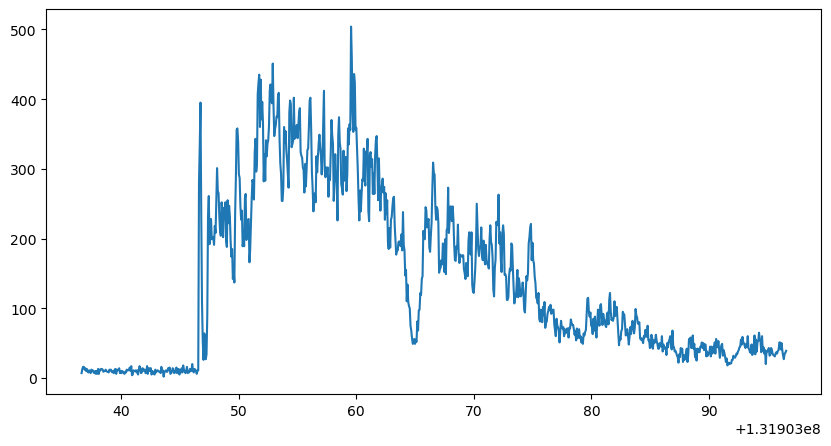

In [14]:
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(time_bins[:-1], y[:, 0])

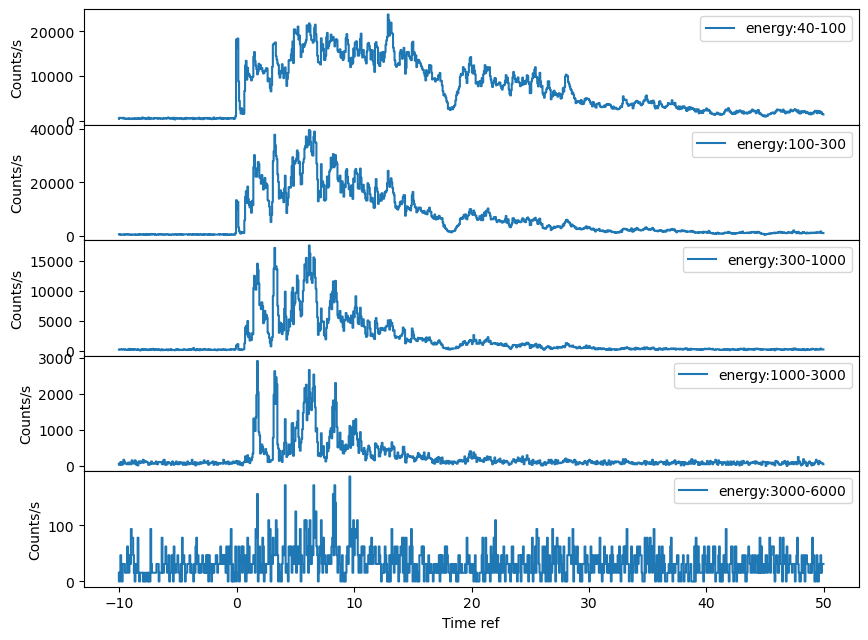

In [80]:
choose_lc_y = dets_lc_y

sub_fig_num = choose_lc_y.shape[1]

fig, axes = plt.subplots(sub_fig_num, 1, figsize=(10, sub_fig_num*1.5))

for index in range(sub_fig_num):
    ax = axes[index]

    ax.step(time_bins[:-1] - trig_met, choose_lc_y[:, index],
            label=f"energy:{energy_bins[index]}-{energy_bins[index + 1]}")
    ax.set_ylabel("Counts/s")
    ax.legend()

axes[-1].set_xlabel(f"Time ref")
# plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)